In [ ]:
# importing essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
df = pd.read_csv("/content/emp_details.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID.1,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,1.0,6,1,0,0,1,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,6.0,3,5,1,4,2,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,5.0,2,5,0,3,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,13.0,5,8,7,5,4,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,9.0,2,6,0,4,5,3,3,4.0,1.0,3.0


In [ ]:
df.size

127890

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmployeeID.1',
       'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [ ]:
# helper function to get shape of the dataset
def get_shape(df):
    print('Now there are', df.shape[0], 'rows and',df.shape[1],'columns in this dataset')

In [ ]:
# print out the shape of the dataset
get_shape(df)

Now there are 4410 rows and 29 columns in this dataset


In [ ]:
# count unique values of each features
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
EmployeeID.1               4410
JobInvolvement                4
PerformanceRating             2
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
dtype: int64

In [ ]:
df = df.dropna()


In [ ]:
# check missing data for each feature
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EmployeeID.1               0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [ ]:
# check datatype and other information for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   object 
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   EmployeeCount            4300 non-null   int64  
 8   EmployeeID               4300 non-null   int64  
 9   Gender                   4300 non-null   object 
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   object 
 12  MaritalStatus            4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
# separate features into numerical and non numerical groups
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StandardHours', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmployeeID.1', 'JobInvolvement', 'PerformanceRating'], float64: ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']}

In [ ]:
# check statistical distribution for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4300.0,36.926977,9.146517,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4300.0,9.197907,8.097059,1.0,2.00,7.0,14.00,29.0
Education,4300.0,2.913256,1.024774,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4300.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4300.0,2211.695116,1272.117692,1.0,1110.75,2215.5,3314.25,4409.0
JobLevel,4300.0,2.066977,1.106633,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4300.0,65059.844186,47045.398914,10090.0,29260.00,49360.0,83802.50,199990.0
NumCompaniesWorked,4300.0,2.690000,2.495764,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4300.0,15.210698,3.662777,11.0,12.00,14.0,18.00,25.0
StandardHours,4300.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [ ]:
# drop out features that give out useless information
df = df.drop(columns = ['EmployeeID', 'EmployeeCount', 'StandardHours', 'Over18'])
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID.1,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,1.0,6,1,0,0,1,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,6.0,3,5,1,4,2,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,5.0,2,5,0,3,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,13.0,5,8,7,5,4,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,9.0,2,6,0,4,5,3,3,4.0,1.0,3.0


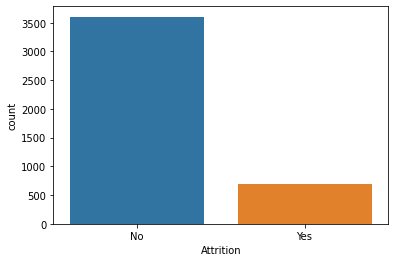

In [ ]:
# check distribution for target variable
sns.countplot(x = 'Attrition', data = df);
plt.savefig('attrition.png')

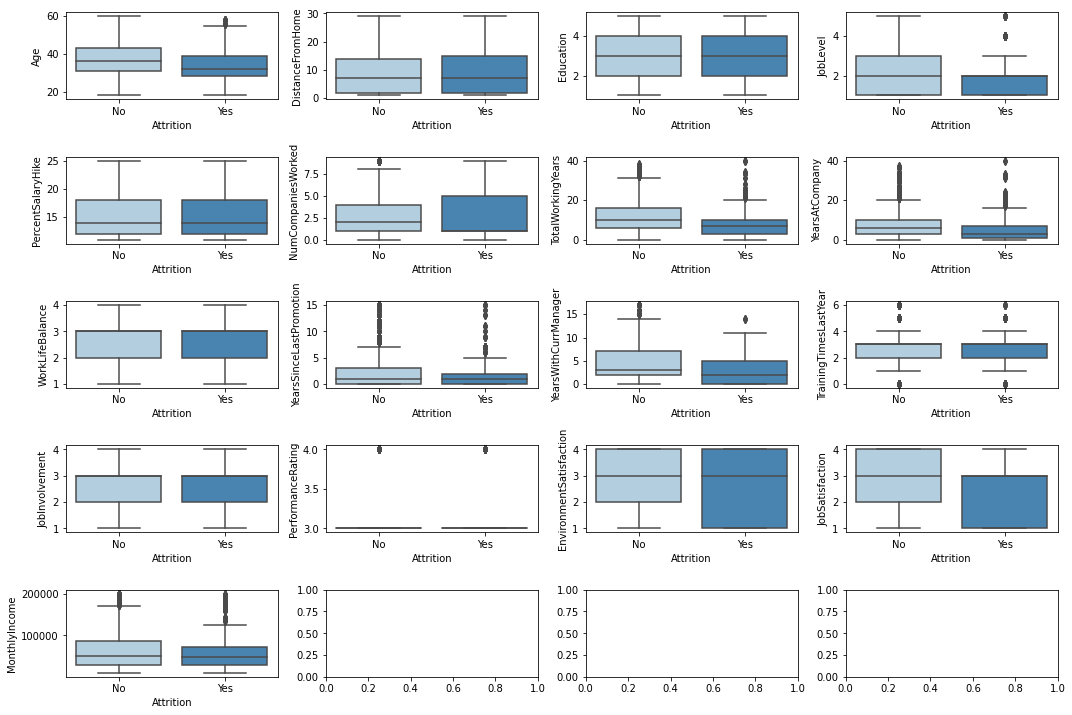

In [ ]:
# visualization for numerical features
fig, axss = plt.subplots(5,4, figsize=[15,10])
sns.boxplot(x='Attrition', y ='Age', data=df, ax=axss[0][0],palette="Blues")
sns.boxplot(x='Attrition', y ='DistanceFromHome', data=df, ax=axss[0][1],palette="Blues")
sns.boxplot(x='Attrition', y ='Education', data=df, ax=axss[0][2],palette="Blues")
sns.boxplot(x='Attrition', y ='JobLevel', data=df, ax=axss[0][3],palette="Blues")
sns.boxplot(x='Attrition', y ='PercentSalaryHike', data=df, ax=axss[1][0],palette="Blues")
sns.boxplot(x='Attrition', y ='NumCompaniesWorked', data=df, ax=axss[1][1],palette="Blues")
sns.boxplot(x='Attrition', y ='TotalWorkingYears', data=df, ax=axss[1][2],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsAtCompany', data=df, ax=axss[1][3],palette="Blues")
sns.boxplot(x='Attrition', y ='WorkLifeBalance', data=df, ax=axss[2][0],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsSinceLastPromotion', data=df, ax=axss[2][1],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsWithCurrManager', data=df, ax=axss[2][2],palette="Blues")
sns.boxplot(x='Attrition', y ='TrainingTimesLastYear', data=df, ax=axss[2][3],palette="Blues")

sns.boxplot(x='Attrition', y ='JobInvolvement', data=df, ax=axss[3][0],palette="Blues")
sns.boxplot(x='Attrition', y ='PerformanceRating', data=df, ax=axss[3][1],palette="Blues")
sns.boxplot(x='Attrition', y ='EnvironmentSatisfaction', data=df, ax=axss[3][2],palette="Blues")
sns.boxplot(x='Attrition', y ='JobSatisfaction', data=df, ax=axss[3][3],palette="Blues")
sns.boxplot(x='Attrition', y ='MonthlyIncome', data=df, ax=axss[4][0],palette="Blues")
#sns.boxplot(x='Attrition', y ='', data=df, ax=axss[4][1],palette="Blues")

plt.tight_layout()
plt.savefig('numerical_dist.png');

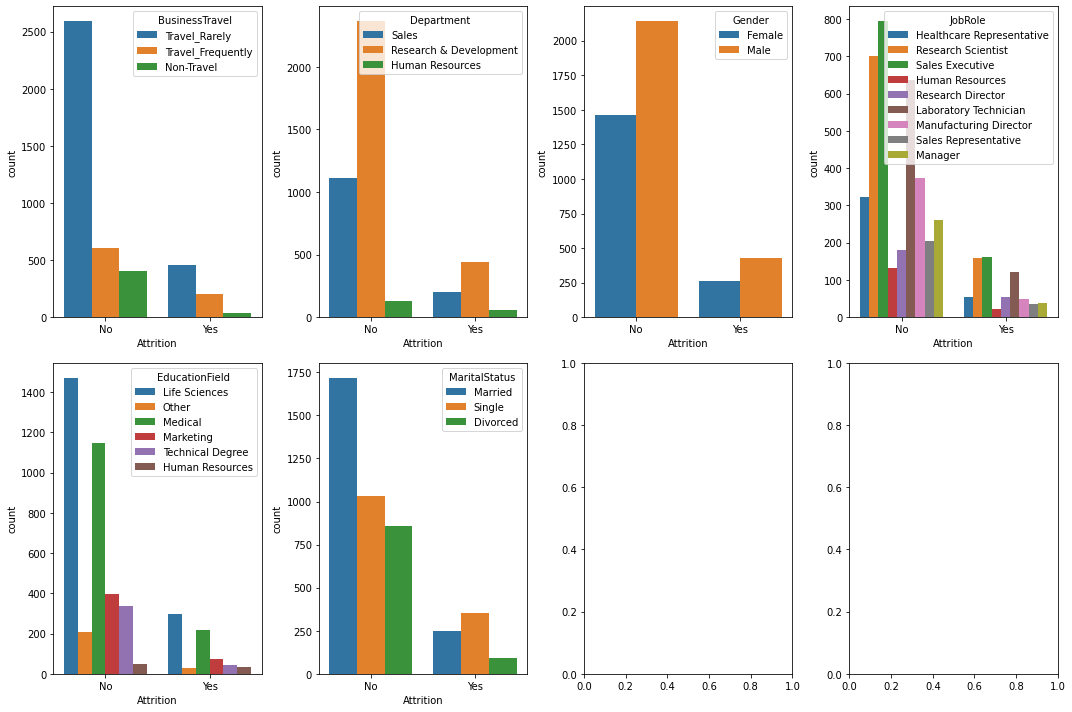

In [ ]:
# visualization for non numerical features
fig,axss = plt.subplots(2,4, figsize=[15,10])
sns.countplot(x='Attrition', hue='BusinessTravel', data=df, ax=axss[0][0])
sns.countplot(x='Attrition', hue='Department', data=df, ax=axss[0][1])
sns.countplot(x='Attrition', hue='Gender', data=df, ax=axss[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=df, ax=axss[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=df, ax=axss[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=df, ax=axss[1][1])
#sns.countplot(x='Attrition', hue='Over18', data=df, ax=axss[1][2])
plt.tight_layout()
plt.savefig('cate_dist.png');

In [ ]:

df


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID.1,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,1.0,6,1,0,0,1,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,6.0,3,5,1,4,2,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,5.0,2,5,0,3,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,13.0,5,8,7,5,4,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,9.0,2,6,0,4,5,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,Single,35390,1.0,18,6.0,2,6,1,5,4405,2,3,3.0,4.0,3.0
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,10.0,5,3,0,2,4406,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,10.0,2,3,0,2,4407,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,5.0,4,4,1,2,4408,3,4,1.0,3.0,3.0


In [ ]:
# tranform binary feature into 0 and 1
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
#df['Over18'] = df['Over18'].map({'Y': 1, 'N': 0})

In [ ]:
# check correlation between numerical features and target variable
corr_score = df[['Age','Attrition','BusinessTravel','Department','DistanceFromHome', 'Education', 'EducationField', \
        'Gender', 'JobLevel', 'JobRole', 'JobLevel',\
        'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', \
        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', \
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement',\
        'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction',\
        'WorkLifeBalance']].corr()
corr_score

,Age,Attrition,DistanceFromHome,Education,JobLevel,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
Age,1.000000,-0.155584,0.004621,-0.034452,-0.000781,-0.000781,-0.047256,0.303709,-0.034313,0.681213,-0.032032,0.314384,0.216554,0.204117,0.021284,-0.025059,0.007983,0.000868,-0.024756
Attrition,-0.155584,1.000000,-0.008314,-0.015237,-0.014587,-0.014587,-0.032629,0.043911,0.034425,-0.168637,-0.046239,-0.133612,-0.029931,-0.155420,-0.014705,0.026262,-0.103485,-0.103098,-0.059817
DistanceFromHome,0.004621,-0.008314,1.000000,-0.006369,-0.038576,-0.038576,-0.019798,-0.016336,0.035857,0.004364,-0.006383,0.030998,0.001888,0.020876,-0.007972,0.035974,0.018882,-0.011494,0.009345
Education,-0.034452,-0.015237,-0.006369,1.000000,0.043686,0.043686,0.006381,-0.018156,-0.043592,-0.008236,0.009327,0.008297,0.026970,0.007476,-0.020804,-0.035579,-0.044403,-0.005895,-0.005480
JobLevel,-0.000781,-0.014587,-0.038576,0.043686,1.000000,1.000000,0.045015,-0.008314,0.010119,-0.035378,-0.032476,-0.064122,-0.058601,-0.053771,-0.015054,-0.001362,-0.023156,-0.018841,-0.022040
JobLevel,-0.000781,-0.014587,-0.038576,0.043686,1.000000,1.000000,0.045015,-0.008314,0.010119,-0.035378,-0.032476,-0.064122,-0.058601,-0.053771,-0.015054,-0.001362,-0.023156,-0.018841,-0.022040
MonthlyIncome,-0.047256,-0.032629,-0.019798,0.006381,0.045015,0.045015,1.000000,-0.020110,0.008684,-0.029776,0.044378,0.001878,0.063361,0.025514,0.028555,0.021096,-0.005380,0.003420,0.003702
NumCompaniesWorked,0.303709,0.043911,-0.016336,-0.018156,-0.008314,-0.008314,-0.020110,1.000000,0.030201,0.240077,-0.030093,-0.115143,-0.033514,-0.107591,0.026559,0.018649,0.012443,-0.059525,-0.008871
PercentSalaryHike,-0.034313,0.034425,0.035857,-0.043592,0.010119,0.010119,0.008684,0.030201,1.000000,-0.021199,-0.035020,-0.027679,-0.028367,-0.039807,-0.003603,0.773902,-0.003072,0.036671,-0.040252
TotalWorkingYears,0.681213,-0.168637,0.004364,-0.008236,-0.035378,-0.035378,-0.029776,0.240077,-0.021199,1.000000,-0.041759,0.633194,0.407077,0.463369,0.004724,-0.002544,-0.003919,-0.013379,-0.000430


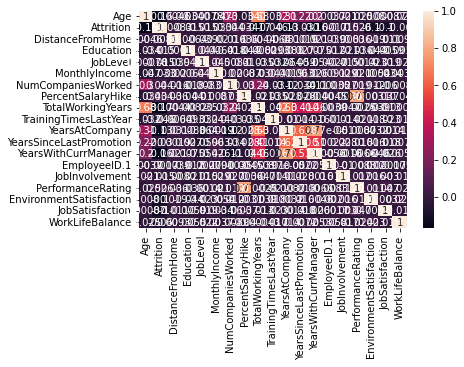

In [ ]:
sns.heatmap(df.corr(),annot=True)